In [1]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score,confusion_matrix,f1_score,cohen_kappa_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import time 

In [2]:
?LGBMClassifier

In [47]:
##或者使用 alldata=pd.read_csv('E:/研究生相关/统计学习1课件/数据分析项目与小论文/数据分析项目/trainset.csv',index_col=0) 
##将第一列变为index的值
alldata=pd.read_csv('E:/研究生相关/统计学习1课件/数据分析项目与小论文/数据分析项目/trainset.csv')
alldata=alldata.drop(alldata.columns[0],axis=1)
test=pd.read_csv('E:/研究生相关/统计学习1课件/数据分析项目与小论文/数据分析项目/testxset.csv')
test=test.drop('Unnamed: 0',axis=1)

碰到字符串变量中含有nan(缺失值),用LabelEncoder函数将字符串转化为数字时,就会出现报错现象,将这些变量转化为np.string_类型

In [48]:
#lightgbm不接受字符串，故先将字符串转化为数字，通过LabelEncoder函数实现
#找出类别变量
alldata['emp_length']=alldata['emp_length'].astype(np.string_)
categorical_features=np.where(alldata.dtypes==object)[0]
class_le=LabelEncoder()
#用class_le先fit，之后再实行transform
for i in categorical_features:
    class_le.fit(alldata.iloc[:,i].values)
    alldata.iloc[:,i]=class_le.transform(alldata.iloc[:,i].values)
alldata.head()

,y,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,0,36000,1,17.97,913.58,3,15,9,3,9515,...,7.0,24.0,4.0,22.2,0,259812.0,138100,76800,181515.0,0
1,0,3000,0,17.97,108.42,3,15,1,3,30978,...,7.0,22.0,1.0,30.0,1,69552.0,31910,20000,37734.0,0
2,0,35000,0,12.98,1178.96,1,9,2,3,3219,...,8.0,10.0,1.0,100.0,0,76400.0,63497,56800,11000.0,1
3,0,26500,1,11.31,580.28,1,7,1,1,6808,...,10.0,17.0,4.0,66.7,0,430403.0,107975,49300,88875.0,1
4,0,3000,0,15.02,104.03,2,12,4,1,37842,...,7.0,13.0,3.0,25.0,0,400137.0,60074,11500,50524.0,0


In [49]:
x_train=alldata.iloc[:,1:]
y_train=alldata.iloc[:,0]

In [59]:
start = time.time()
estimator=LGBMClassifier(objective='binary',colsample_bytree=0.8,subsample=0.8,
                         eval_metric='auc',learning_rate=0.3,n_estimators=25)
param_grid={'max_depth':range(6,18,3),
           'num_leaves':range(1000,10000,2000)}
gs=GridSearchCV(estimator,param_grid,cv=3)
print(gs.fit(x_train.head(100000),y_train.head(100000)))
print('{:.2f}'.format(time.time()-start)+' sec')

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.3, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=25,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid=

In [10]:
#网格化搜索max_depth,num_leaves，且num_leaves<2**max_depth
estimator=LGBMClassifier(objective='binary',colsample_bytree=0.8,subsample=0.8,
                         eval_metric='auc',learning_rate=0.3,n_estimators=25)
param_grid={'max_depth':range(6,18,3),
           'num_leaves':range(1000,10000,2000)}
gs=GridSearchCV(estimator,param_grid,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.3, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=25,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid=

In [11]:
gs.best_score_

0.8228750973688472

In [12]:
gs.best_params_

{'max_depth': 6, 'num_leaves': 1000}

In [13]:
param_grid={'max_depth':range(3,7,1),
           'num_leaves':range(50,220,30)}
gs=GridSearchCV(estimator,param_grid,cv=3)
gs.fit(x_train,y_train)
#由于num_leaves为下界，再进行调优

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.3, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=25,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid=

In [14]:
gs.best_score_

0.8772505661189886

In [15]:
gs.best_params_

{'max_depth': 3, 'num_leaves': 50}

In [13]:
estimator=LGBMClassifier(binary='objective',eval_metric='auc',colsample_bytree=0.8,
                        subsample=0.8,learning_rate=0.3,n_estimators=25,max_depth=4)
param_grid={'num_leaves':range(6,10,1)}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)
#最后优化时缩小间距，逐渐中心化调优

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(binary='objective', boosting_type='gbdt',
                                      class_weight=None, colsample_bytree=0.8,
                                      eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.3, max_depth=4,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=25,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=0.8, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None, param_gri

In [14]:
gs.best_score_

0.9775569896130849

In [15]:
gs.best_params_

{'num_leaves': 8}

In [18]:
# 最优 max_depth=4,num_leaves=8
#网格化搜索 learning_rate 和 n_estimators
estimator=LGBMClassifier(objective='binary',eval_metric='auc',subsample=0.8,
                        colsample_bytree=0.8,max_depth=4,num_leaves=8)
param_grid={'learning_rate':np.arange(0.05,0.35,0.05),
           'n_estimators':[20,30,40]}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=4,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=8,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={

In [19]:
gs.best_score_

0.979447822511406

In [20]:
gs.best_params_

{'learning_rate': 0.3, 'n_estimators': 40}

In [22]:
param_grid={'learning_rate':np.arange(0.3,0.7,0.1),
           'n_estimators':range(40,80,10)}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.8, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=4,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=8,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=0.8,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={

In [24]:
gs.best_score_

0.9812527084598035

In [26]:
gs.best_params_

{'learning_rate': 0.3, 'n_estimators': 70}

In [12]:
#最优 learning_rate=0.3,n_estimators=70
#网格化搜索 min_child_samples和max_bin
from time import *
begin_time=time()
estimator=LGBMClassifier(objective='binary',colsample_bytree=0.8,subsample=0.8,
                        max_depth=4,num_leaves=8,learning_rate=0.3,n_estimators=70,
                        save_binary='true',max_bin=240)
param_grid={'min_child_samples':range(18,23,1),
           'max_bin':range(230,270,10)}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)
end_time=time()
run_time=end_time-begin_time

In [18]:
run_time/60

19.757814180850982

In [15]:
gs.best_score_

0.981098908654677

In [19]:
param_grid={
    'min_child_samples':range(14,19,2),
    'max_bin':range(253,257,1)
}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'max_bin': 255, 'min_child_samples': 16}

In [20]:
gs.best_score_

0.9812671837355801

In [29]:
#最优 max_bin=255,min_child_samples=16
#网格化搜索 colsample_bytree和subsample
estimator=LGBMClassifier(objective='binary',max_depth=4,num_leaves=8,learning_rate=0.3,
                        n_estimators=70,min_child_samples=16,max_bin=255,
                         save_binary='true')
param_grid={'colsample_bytree':np.arange(0.7,1.0,0.1),
           'subsample':np.arange(0.7,1.0,0.1)}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.3, max_bin=255,
                                      max_depth=4, min_child_samples=16,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=70,
                                      n_jobs=-1, num_leaves=8,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      save_binary='true', silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
            

In [30]:
gs.best_score_

0.9812671837355801

In [31]:
gs.best_params_

{'colsample_bytree': 0.7999999999999999, 'subsample': 0.7}

In [40]:
#subsample取在边界，继续搜索
estimator=LGBMClassifier(objective='binary',max_depth=4,num_leaves=8,learning_rate=0.3,
                        n_estimators=70,min_child_samples=16,max_bin=255,
                         save_binary='true',colsample_bytree=0.8)
param_grid={'subsample':np.arange(0.6,0.8,0.05)}
gs=GridSearchCV(estimator,param_grid,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(bagging_freq=5, boosting_type='gbdt',
                                      class_weight=None, colsample_bytree=0.8,
                                      importance_type='split',
                                      learning_rate=0.3, max_bin=255,
                                      max_depth=4, min_child_samples=16,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=70,
                                      n_jobs=-1, num_leaves=8,
                                      objective='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      save_binary='true', silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=No

In [41]:
gs.best_score_

0.9810446263705146

In [42]:
gs.best_params_

{'subsample': 0.8000000000000002}

In [127]:
#最优参数如下
gbm=LGBMClassifier(objective='binary',max_depth=4,num_leaves=8,learning_rate=0.3,
                  n_estimators=70,min_child_samples=16,max_bin=255,
                  colsample_bytree=0.8,subsample=0.7)

[1]	training's auc: 0.874416	training's binary_logloss: 0.360177
Training until validation scores don't improve for 5 rounds
[2]	training's auc: 0.875305	training's binary_logloss: 0.339537
[3]	training's auc: 0.882749	training's binary_logloss: 0.33395
[4]	training's auc: 0.885909	training's binary_logloss: 0.319039
[5]	training's auc: 0.887902	training's binary_logloss: 0.314592
[6]	training's auc: 0.890517	training's binary_logloss: 0.302882
[7]	training's auc: 0.893543	training's binary_logloss: 0.292937
[8]	training's auc: 0.899963	training's binary_logloss: 0.283277
[9]	training's auc: 0.903454	training's binary_logloss: 0.276493
[10]	training's auc: 0.904271	training's binary_logloss: 0.269581
[11]	training's auc: 0.905735	training's binary_logloss: 0.265189
[12]	training's auc: 0.907507	training's binary_logloss: 0.257062
[13]	training's auc: 0.905849	training's binary_logloss: 0.249847
[14]	training's auc: 0.907262	training's binary_logloss: 0.243379
[15]	training's auc: 0.909

LGBMClassifier(bagging_fraction=0.6, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, eval_metric='auc', feature_fraction=0.9,
               importance_type='split', learning_rate=0.06, max_depth=3,
               min_child_samples=18, min_child_weight=0.0005,
               min_split_gain=0.0, n_estimators=88, n_jobs=-1, num_leaves=6,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [37]:
#第一个抽样
x_train1,x_test1,y_train1,y_test1=train_test_split(x_train,y_train,test_size=1/3,random_state=1)

In [134]:
gbm1=LGBMClassifier(objective='binary',max_depth=4,num_leaves=8,
                   learning_rate=0.3,n_estimators=70,min_child_samples=16,max_bin=255,
                   colsample_bytree=0.8,subsample=0.7)
gbm1.fit(x_train1,y_train1,eval_metric={'binary_logloss','auc'},early_stopping_rounds=5,eval_set=[(x_train,y_train)])

[1]	valid_0's auc: 0.892176	valid_0's binary_logloss: 0.219706
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.938264	valid_0's binary_logloss: 0.180656
[3]	valid_0's auc: 0.940942	valid_0's binary_logloss: 0.156723
[4]	valid_0's auc: 0.944992	valid_0's binary_logloss: 0.145828
[5]	valid_0's auc: 0.949724	valid_0's binary_logloss: 0.139243
[6]	valid_0's auc: 0.956803	valid_0's binary_logloss: 0.127778
[7]	valid_0's auc: 0.955986	valid_0's binary_logloss: 0.123901
[8]	valid_0's auc: 0.955722	valid_0's binary_logloss: 0.119659
[9]	valid_0's auc: 0.957799	valid_0's binary_logloss: 0.114793
[10]	valid_0's auc: 0.958993	valid_0's binary_logloss: 0.110866
[11]	valid_0's auc: 0.961877	valid_0's binary_logloss: 0.1072
[12]	valid_0's auc: 0.961656	valid_0's binary_logloss: 0.105872
[13]	valid_0's auc: 0.962149	valid_0's binary_logloss: 0.104907
[14]	valid_0's auc: 0.963382	valid_0's binary_logloss: 0.10257
[15]	valid_0's auc: 0.964583	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.3, max_bin=255,
               max_depth=4, min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=70, n_jobs=-1, num_leaves=8,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)

In [135]:
pred_test1=gbm1.predict(x_test1)
kappa1=cohen_kappa_score(pred_test1,y_test1)
f1=f1_score(y_true=y_test1,y_pred=pred_test1)
print('kappa1:',kappa1,'F-measure1:',f1)

kappa1: 0.915170167972228 F-measure1: 0.9254234638618117


In [56]:
#第二个抽样
x_train2,x_test2,y_train2,y_test2=train_test_split(x_train,y_train,test_size=1/3,random_state=2)

In [136]:
gbm1.fit(x_train2,y_train2,eval_metric={'binary_logloss','auc'},early_stopping_rounds=5,eval_set=[(x_train,y_train)])

[1]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.218925
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.940417	valid_0's binary_logloss: 0.180141
[3]	valid_0's auc: 0.941219	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.945471	valid_0's binary_logloss: 0.145555
[5]	valid_0's auc: 0.946761	valid_0's binary_logloss: 0.138878
[6]	valid_0's auc: 0.952681	valid_0's binary_logloss: 0.12804
[7]	valid_0's auc: 0.953963	valid_0's binary_logloss: 0.124681
[8]	valid_0's auc: 0.955332	valid_0's binary_logloss: 0.120135
[9]	valid_0's auc: 0.95725	valid_0's binary_logloss: 0.115176
[10]	valid_0's auc: 0.960116	valid_0's binary_logloss: 0.111832
[11]	valid_0's auc: 0.961243	valid_0's binary_logloss: 0.10947
[12]	valid_0's auc: 0.961116	valid_0's binary_logloss: 0.108109
[13]	valid_0's auc: 0.962182	valid_0's binary_logloss: 0.107342
[14]	valid_0's auc: 0.963685	valid_0's binary_logloss: 0.104097
[15]	valid_0's auc: 0.964684	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.3, max_bin=255,
               max_depth=4, min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=70, n_jobs=-1, num_leaves=8,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)

In [137]:
pred_test2=gbm1.predict(x_test2)
kappa2=cohen_kappa_score(pred_test2,y_test2)
f2=f1_score(y_true=y_test2,y_pred=pred_test2)
print('kappa2:',kappa2,'F-measure2:',f2)

kappa2: 0.9121601799027738 F-measure2: 0.9228186427110202


In [93]:
#第三个抽样
x_train3,x_test3,y_train3,y_test3=train_test_split(x_train,y_train,test_size=1/3,random_state=3)

In [143]:
gbm1.fit(x_train3,y_train3,eval_metric='auc',early_stopping_rounds=5,eval_set=[(x_train,y_train)])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.3, max_bin=255,
               max_depth=4, min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=70, n_jobs=-1, num_leaves=8,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)

In [144]:
pred_test3=gbm1.predict(x_test3)
kappa3=cohen_kappa_score(pred_test3,y_test3)
f3=f1_score(y_true=y_test3,y_pred=pred_test3)
print('kappa3:',kappa3,'F-meaure3:',f3)

kappa3: 0.9141526459838484 F-meaure3: 0.9245988178017324


In [141]:
mean_kappa=(kappa1+kappa2+kappa3)/3
mean_Fmeasure=(f1+f2+f3)/3

In [129]:
#最终预测,categorical_features最后的那个[0]不要忘记,本身对象是个列表
categorical_features_test=np.where(test.dtypes==np.object)[0]
test['emp_length']=test['emp_length'].astype(np.string_)
class_le=LabelEncoder()
for i in categorical_features_test:
    class_le.fit(test.iloc[:,i].values)
    test.iloc[:,i]=class_le.transform(test.iloc[:,i].values)
test.head()   

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,9600,0,23.40,373.62,4,20,9,3,65000.0,0,...,9,12,1,85.7,0,68902,24165,7600,40402,0
1,16000,0,14.47,550.51,2,11,1,3,150000.0,1,...,19,24,0,85.7,0,116647,57465,32100,42847,0
2,15000,0,15.02,520.13,2,12,11,1,42000.0,2,...,1,5,2,33.3,0,67397,11750,8000,7000,0
3,10000,1,12.98,227.43,1,9,2,3,62000.0,0,...,4,7,2,0.0,0,50500,30552,14900,20000,0
4,24000,1,12.98,545.83,1,9,1,1,140000.0,1,...,17,31,1,31.8,0,528705,145356,125000,123596,0


In [145]:
gbm=LGBMClassifier(objective='binary',max_depth=4,num_leaves=8,learning_rate=0.3,
                  n_estimators=70,min_child_samples=16,max_bin=255,
                  colsample_bytree=0.8,subsample=0.7)
gbm.fit(x_train,y_train,eval_metric='auc',early_stopping_rounds=5,eval_set=[(x_train,y_train)])

[1]	training's auc: 0.892133	training's binary_logloss: 0.219218
Training until validation scores don't improve for 5 rounds
[2]	training's auc: 0.94084	training's binary_logloss: 0.180361
[3]	training's auc: 0.941138	training's binary_logloss: 0.156482
[4]	training's auc: 0.947535	training's binary_logloss: 0.145624
[5]	training's auc: 0.951268	training's binary_logloss: 0.138324
[6]	training's auc: 0.957593	training's binary_logloss: 0.127545
[7]	training's auc: 0.958504	training's binary_logloss: 0.122717
[8]	training's auc: 0.96032	training's binary_logloss: 0.116966
[9]	training's auc: 0.962264	training's binary_logloss: 0.112252
[10]	training's auc: 0.962831	training's binary_logloss: 0.108608
[11]	training's auc: 0.963605	training's binary_logloss: 0.107416
[12]	training's auc: 0.96379	training's binary_logloss: 0.106716
[13]	training's auc: 0.962594	training's binary_logloss: 0.105369
[14]	training's auc: 0.964081	training's binary_logloss: 0.102503
[15]	training's auc: 0.96605

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.3, max_bin=255,
               max_depth=4, min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=70, n_jobs=-1, num_leaves=8,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=0.7,
               subsample_for_bin=200000, subsample_freq=0)

In [155]:
#将预测出的test_pred输出
pred_test=gbm.predict(test)
result_lightgbm=pd.DataFrame(pred_test)
result_lightgbm.to_csv('E:/研究生相关/统计学习1课件/数据分析项目与小论文/数据分析项目/result_lightgbm1.csv')

,0
0,26708
1,3292


In [165]:
#画出重要性变量
import matplotlib.pylab as plt
import lightgbm as lgb

<Figure size 864x432 with 0 Axes>

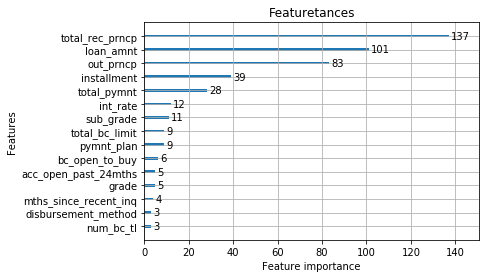

In [167]:
plt.figure(figsize=(12,6))
lgb.plot_importance(gbm,max_num_features=15)
plt.title('Featuretances')
plt.show()